In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy.stats import pearsonr, shapiro
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

ModuleNotFoundError: No module named 'tensorflow.python'

In [ ]:
data_dir_1 = "2001-2024.csv"
weather = pd.read_csv(data_dir_1)

In [ ]:
weather = pd.read_csv('2001-2024.csv')

In [ ]:
print(weather)

            Date  Temp_max(c)  Temp_avg(c)  Temp_min(c)  Dew_max(c)  \
0      1/01/2001         32.8         28.7         25.0        23.9   
1      2/01/2001         31.1         24.8        -17.8        25.0   
2      3/01/2001         30.0         26.8         25.0        25.0   
3      4/01/2001         28.9         26.0         22.8        23.9   
4      5/01/2001         32.2         27.3         23.9        23.9   
...          ...          ...          ...          ...         ...   
8242  26/05/2024         35.0         28.7         26.1        26.1   
8243  27/05/2024         33.9         28.5         26.1        27.2   
8244  28/05/2024         33.9         29.7         26.1        27.2   
8245  29/05/2024         36.1         30.0         27.2        26.1   
8246  30/05/2024         33.9         28.5         26.1        27.2   

      Dew_avg(c)  Dew_min(c)  Hum_max(%)  Hum_avg(%)  Hum_min(%)  \
0           23.4        22.8          94        74.5          55   
1          

In [ ]:

print(weather.isna().sum())


Date             0
Temp_max(c)      0
Temp_avg(c)      0
Temp_min(c)      0
Dew_max(c)       0
Dew_avg(c)       0
Dew_min(c)       0
Hum_max(%)       0
Hum_avg(%)       0
Hum_min(%)       0
Wind_max(mph)    0
Wind_avg(mph)    0
Wind_min(mph)    0
Pres_max(in)     0
Pres_avg(in)     0
Pres_min(in)     0
Precipitation    0
dtype: int64


In [ ]:

print(weather.shape)

(8247, 17)


In [ ]:
weather_df = weather.drop('Date', axis=1)

In [ ]:
print(weather_df.isna().sum())

Temp_max(c)      0
Temp_avg(c)      0
Temp_min(c)      0
Dew_max(c)       0
Dew_avg(c)       0
Dew_min(c)       0
Hum_max(%)       0
Hum_avg(%)       0
Hum_min(%)       0
Wind_max(mph)    0
Wind_avg(mph)    0
Wind_min(mph)    0
Pres_max(in)     0
Pres_avg(in)     0
Pres_min(in)     0
Precipitation    0
dtype: int64


<Axes: ylabel='Temp_avg(c)'>

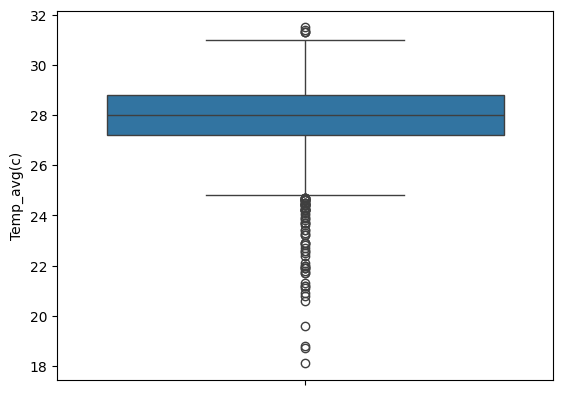

In [ ]:
sns.boxplot(weather_df['Temp_avg(c)'])

In [ ]:
plt.show()

In [ ]:
Q1 = weather_df['Temp_avg(c)'].quantile(0.25)
Q3 = weather_df['Temp_avg(c)'].quantile(0.75)
IQR = Q3 - Q1
print ("IQR: %.2f" %IQR)

# Calculate the Lower and Upper Fence
Lower_Fence = Q1 - (1.5 * IQR)
Upper_Fence = Q3 + (1.5 * IQR)
print ("Lower_Fence: %.2f" %Lower_Fence)
print ("Upper_Fence: %.2f" %Upper_Fence)

# Display Outliers and filter out the outliers
print("\nDisplay Outliers")
print (weather_df[((weather_df['Temp_avg(c)'] < Lower_Fence) | (weather_df['Temp_avg(c)'] > Upper_Fence))])

# Display data without outliers
weatherRemOut_df = weather_df[~((weather_df['Temp_avg(c)'] < Lower_Fence) | (weather_df['Temp_avg(c)'] > Upper_Fence))]
print("\nDisplay data without outliers")
print(weatherRemOut_df)

IQR: 1.60
Lower_Fence: 24.80
Upper_Fence: 31.20

Display Outliers
      Temp_max(c)  Temp_avg(c)  Temp_min(c)  Dew_max(c)  Dew_avg(c)  \
10           31.1         24.2        -17.8        22.8        20.5   
13           32.2         21.2        -17.8        23.9        17.4   
36           32.2         22.6        -17.8        23.9        19.4   
62           35.0         23.3        -17.8        25.0        18.9   
600          32.8         23.9        -17.8        25.0        21.6   
...           ...          ...          ...         ...         ...   
7003         25.0         23.7         22.8        23.9        22.6   
7352         25.0         24.4         23.9        23.9        23.6   
7495         36.1         31.3         27.2        26.1        24.2   
7754         26.1         24.3         22.2        23.9        22.9   
7790         26.1         24.6         23.9        23.9        23.4   

      Dew_min(c)  Hum_max(%)  Hum_avg(%)  Hum_min(%)  Wind_max(mph)  \
10        

In [ ]:
# Shuffle the data to avoid bias
df_shuffled = shuffle(weatherRemOut_df, random_state=42)

In [ ]:
# Initialize RobustScaler
scaler = RobustScaler()

In [ ]:
# Fit the scaler to data and transform
scaled_data = scaler.fit_transform(df_shuffled)


In [ ]:
# Convert back to DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=df_shuffled.columns)
print("\nScaled Data: \n", scaled_df)


Scaled Data: 
       Temp_max(c)  Temp_avg(c)  Temp_min(c)  Dew_max(c)  Dew_avg(c)  \
0        0.000000      -0.3125          0.0         0.0    0.307692   
1       -0.352941      -0.7500         -1.0         0.0   -0.230769   
2        0.647059       0.3125          0.0         0.5    0.769231   
3       -0.352941      -0.4375          0.0        -0.5   -0.538462   
4       -1.000000      -0.3750          0.0         0.5    0.461538   
...           ...          ...          ...         ...         ...   
8164     0.647059       0.3125          1.0         0.5    0.153846   
8165     0.647059       0.6250          0.0        -0.5   -0.538462   
8166     1.294118       0.4375          0.0         0.0    0.000000   
8167    -1.000000      -1.3750         -1.0         0.5    0.230769   
8168    -1.000000      -0.8750         -1.0         0.0   -0.461538   

      Dew_min(c)  Hum_max(%)  Hum_avg(%)  Hum_min(%)  Wind_max(mph)  \
0      -1.000000         0.0    0.402439         0.7       2

In [ ]:
# Define the dependent variable
DV = 'Temp_avg(c)'
x = scaled_df.drop(DV, axis=1)
y = scaled_df[DV]

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [ ]:
# Define the neural network model
model = Sequential()
model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
164/164 [==============================] - 1s 4ms/step - loss: 4.4260 - val_loss: 0.1477
Epoch 2/100
164/164 [==============================] - 0s 2ms/step - loss: 0.1161 - val_loss: 0.0868
Epoch 3/100
164/164 [==============================] - 0s 3ms/step - loss: 0.0684 - val_loss: 0.0581
Epoch 4/100
164/164 [==============================] - 0s 2ms/step - loss: 0.0673 - val_loss: 0.1173
Epoch 5/100
164/164 [==============================] - 0s 2ms/step - loss: 0.0530 - val_loss: 0.0331
Epoch 6/100
164/164 [==============================] - 0s 2ms/step - loss: 0.0410 - val_loss: 0.2770
Epoch 7/100
164/164 [==============================] - 0s 3ms/step - loss: 0.0647 - val_loss: 0.0759
Epoch 8/100
164/164 [==============================] - 0s 2ms/step - loss: 0.0537 - val_loss: 0.0761
Epoch 9/100
164/164 [==============================] - 0s 2ms/step - loss: 0.1870 - val_loss: 0.9302
Epoch 10/100
164/164 [==============================] - 0s 3ms/step - loss: 0.0498 - val_lo

52/52 [==============================] - 0s 2ms/step


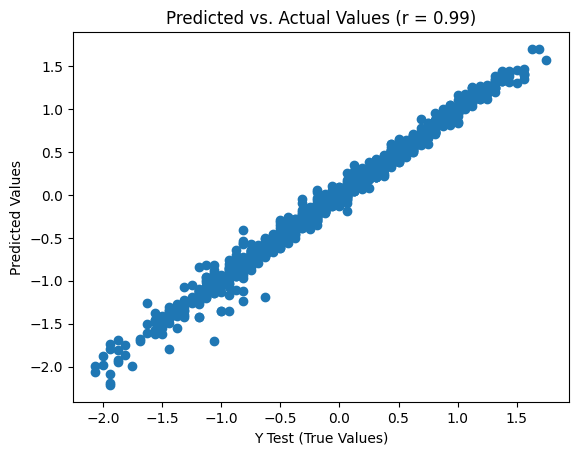

In [ ]:
# Make predictions on the test set
predictions = model.predict(x_test)

# Plot predicted vs actual values
plt.scatter(y_test, predictions)
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values (r = {0:0.2f})'.format(pearsonr(y_test, predictions.flatten())[0]))
plt.show()



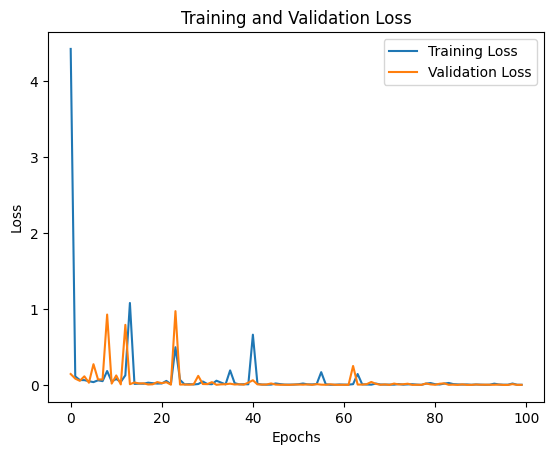

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

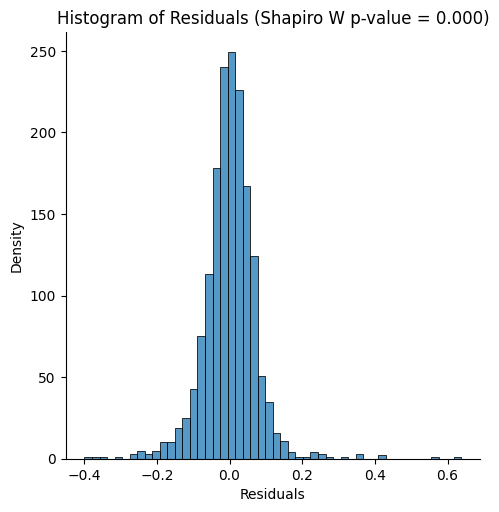

      Metric  Value
0        MAE  0.050
1        MSE  0.005
2       RMSE  0.073
3  R-Squared  0.989


In [ ]:
# Plot the residuals
sns.displot((y_test - predictions.flatten()), bins=50)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Histogram of Residuals (Shapiro W p-value = {0:0.3f})'.format(shapiro(y_test - predictions.flatten())[1]))
plt.show()

# Print evaluation metrics
metrics_df = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R-Squared'],
    'Value': [
        metrics.mean_absolute_error(y_test, predictions),
        metrics.mean_squared_error(y_test, predictions),
        np.sqrt(metrics.mean_squared_error(y_test, predictions)),
        metrics.explained_variance_score(y_test, predictions)
    ]
}).round(3)
print(metrics_df)


In [ ]:
# Flatten predictions for consistency in metrics calculations
predictions_flat = predictions.flatten()

# Compute the evaluation metrics
metrics_df = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R-Squared'],
    'Value': [
        metrics.mean_absolute_error(y_test, predictions_flat),
        metrics.mean_squared_error(y_test, predictions_flat),
        np.sqrt(metrics.mean_squared_error(y_test, predictions_flat)),
        metrics.explained_variance_score(y_test, predictions_flat)
    ]
}).round(3)

# Print the metrics DataFrame
print(metrics_df)

      Metric  Value
0        MAE  0.050
1        MSE  0.005
2       RMSE  0.073
3  R-Squared  0.989
